The dataset contains a variety of interest categories with each row representing a user and each column (except the first one, which is the user ID) representing the count of posts that fall into a specific interest category. The categories cover a broad range of topics, including "chatter," "current_events," "travel," "food," "sports_fandom," "spam," "adult," and many others.

### Key Ideas for Analysis

1. **Data Preprocessing**:
   - **Normalization**: Normalize the counts for each user since different users might have different levels of activity.
   - **Feature Engineering**: Identify meaningful combinations of categories or aggregate similar categories to simplify the analysis.
   - **Filtering**: Consider filtering out users who post a lot of "spam" or "adult" content, as these may represent bots or irrelevant market segments.

2. **Exploratory Data Analysis (EDA)**:
   - **Descriptive Statistics**: Get a sense of the overall distribution of posts across different categories.
   - **Correlation Analysis**: Identify if there are groups of interests that tend to occur together.
   - **Visualization**: Use heatmaps, bar charts, or dimensionality reduction techniques (like PCA) to visualize the data and find patterns.

3. **Market Segmentation**:
   - **Clustering**: Apply clustering algorithms (e.g., K-Means, DBSCAN, Hierarchical Clustering) to segment the users based on their interest profiles.
   - **Latent Factor Analysis**: Use techniques like PCA or Factor Analysis to identify underlying factors that explain the variance in user interests.
   - **Association Rules**: Use association rule mining to find combinations of interests that frequently occur together.

4. **Insights and Reporting**:
   - **Identification of Segments**: Clearly define and describe the segments identified, focusing on what makes each segment unique.
   - **Recommendations**: Provide actionable recommendations for how NutrientH20 could tailor its marketing strategy to each segment.
   - **Visualization**: Include visual representations of segments and key findings to make the report more accessible.

### Next Steps
1. **Normalize** the data to account for varying activity levels.
2. **Conduct EDA** to understand the distribution and relationships between categories.
3. **Apply clustering** techniques to identify distinct market segments.
4. **Generate a report** summarizing the findings and providing recommendations. 

Would you like to proceed with this approach, or do you have any specific analysis in mind?

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('social_marketing.csv')
data.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [2]:
# Rename the 'Unnamed: 0' column to 'user_id' for better clarity
data.rename(columns={'Unnamed: 0': 'user_id'}, inplace=True)

# Perform basic statistics to understand the data distribution
summary_stats = data.describe().transpose()

# Check for any missing values
missing_values = data.isnull().sum()

# summary_stats, missing_values

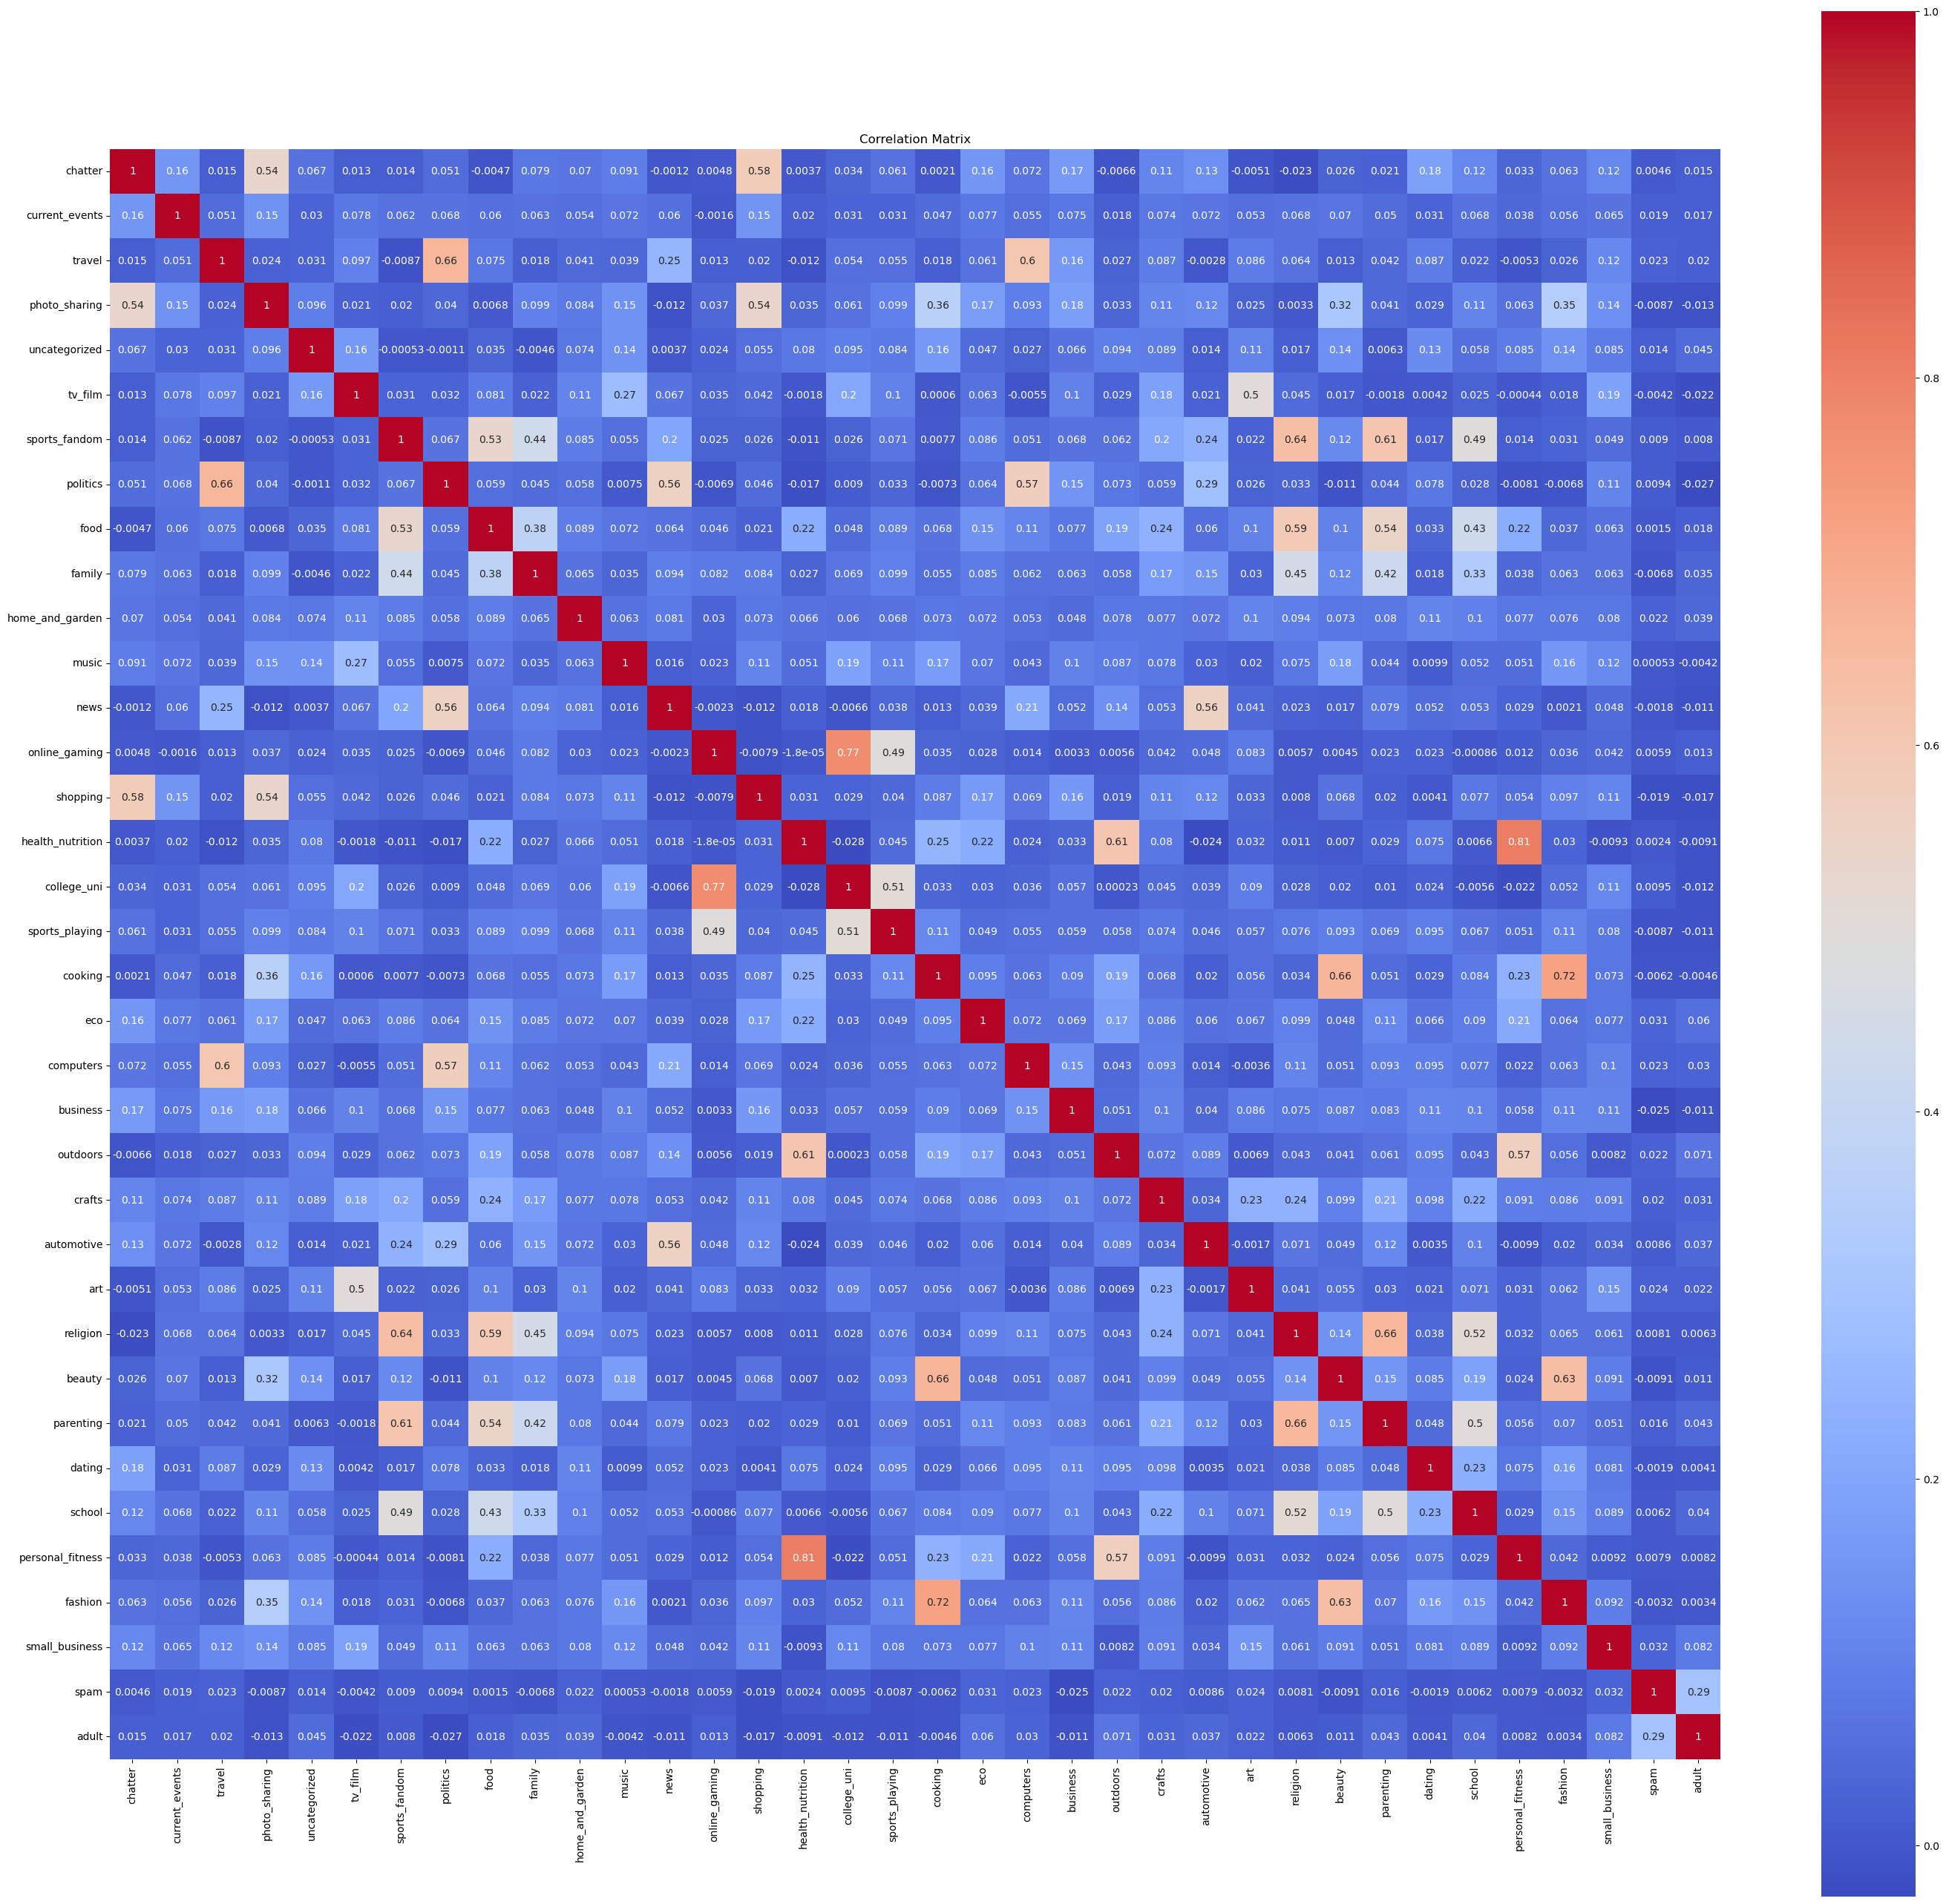

In [3]:
import matplotlib.pyplot as plt
# Select only the numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(35,33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Set the correlation threshold
threshold = 0.6

# Iterate through the correlation matrix and print pairs with correlation above the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) >= threshold:
            print(f"Correlation between = {correlation_matrix.columns[i]} & & {correlation_matrix.columns[j]}: {correlation:.2f}")
            

Correlation between = travel & & politics: 0.66
Correlation between = travel & & computers: 0.60
Correlation between = sports_fandom & & religion: 0.64
Correlation between = sports_fandom & & parenting: 0.61
Correlation between = online_gaming & & college_uni: 0.77
Correlation between = health_nutrition & & outdoors: 0.61
Correlation between = health_nutrition & & personal_fitness: 0.81
Correlation between = cooking & & beauty: 0.66
Correlation between = cooking & & fashion: 0.72
Correlation between = religion & & parenting: 0.66
Correlation between = beauty & & fashion: 0.63


Because we are interpreting the values for health company based off the correlation plot, we can check that health nutrition has high correlation with outdoors, personal fitness,

In [5]:
data.columns

Index(['user_id', 'chatter', 'current_events', 'travel', 'photo_sharing',
       'uncategorized', 'tv_film', 'sports_fandom', 'politics', 'food',
       'family', 'home_and_garden', 'music', 'news', 'online_gaming',
       'shopping', 'health_nutrition', 'college_uni', 'sports_playing',
       'cooking', 'eco', 'computers', 'business', 'outdoors', 'crafts',
       'automotive', 'art', 'religion', 'beauty', 'parenting', 'dating',
       'school', 'personal_fitness', 'fashion', 'small_business', 'spam',
       'adult'],
      dtype='object')

In [6]:
normalized_data = data.drop(columns=['user_id'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(normalized_data)

# PCA for dimension reduction and making clustering plots

In [7]:
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio to determine how many components to retain
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to hold the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance
})

# Display the explained variance
# print(explained_variance_df)

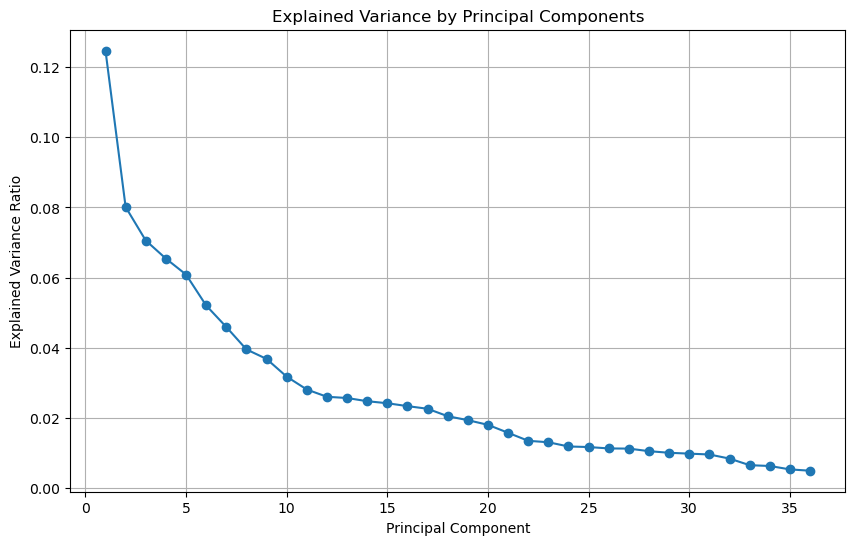

In [8]:
# Plot the explained variance to help decide the number of components to retain
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [9]:
eigenvalues = pca.explained_variance_
n_components_kaiser = sum(eigenvalues > 1)
print(f'Number of components selected using Kaiser Criterion: {n_components_kaiser}')

Number of components selected using Kaiser Criterion: 11


In [10]:
# Retain only the first few components that capture the majority of the variance
n_components = 5 # Example: Retain the first 2 components
pca = PCA(n_components=n_components)
pca_result_reduced = pca.fit_transform(data_scaled)

# Convert the result into a DataFrame
pca_df = pd.DataFrame(data=pca_result_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5
0,1.197421,-0.879195,-2.533459,4.167031,2.029350
1,0.363310,2.005959,-0.202109,-0.799994,-0.291874
2,0.154144,-1.175019,0.980438,-0.860371,0.241233
3,-1.425394,0.339667,0.296896,-0.593298,-0.277882
4,-1.629450,-0.775053,0.343251,-0.906501,0.017505


Explained Variance by Latent Factors: [0.12467878 0.08011168 0.07056843 0.06541427 0.06086704]


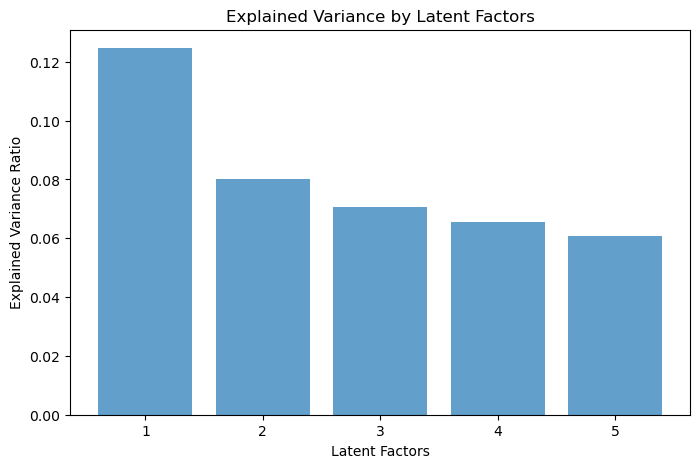

In [11]:
# Add PCA components back to the dataframe
for i in range(1, 6):
    data[f'Latent Factor {i}'] = pca_result_reduced[:, i-1]

# Display the variance explained by each latent factor
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Latent Factors: {explained_variance}')

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), explained_variance, alpha=0.7)
plt.xlabel('Latent Factors')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Latent Factors')
plt.show()

In [12]:
# Get the PCA components (loadings)
loadings = pd.DataFrame(pca.components_.T, columns=[f'Latent Factor {i}' for i in range(1, 6)], index=normalized_data.columns)
print(loadings)

                  Latent Factor 1  Latent Factor 2  Latent Factor 3  \
chatter                  0.125992        -0.197226         0.074807   
current_events           0.097237        -0.064036         0.052240   
travel                   0.116649        -0.039947         0.424260   
photo_sharing            0.180280        -0.303078        -0.010710   
uncategorized            0.094435        -0.146499        -0.030542   
tv_film                  0.097457        -0.079353         0.086210   
sports_fandom            0.287732         0.316924        -0.051997   
politics                 0.130266        -0.013940         0.489903   
food                     0.296910         0.237809        -0.111477   
family                   0.244269         0.196253        -0.049318   
home_and_garden          0.115765        -0.046803         0.021179   
music                    0.124089        -0.144260        -0.012288   
news                     0.127643         0.036199         0.336036   
online

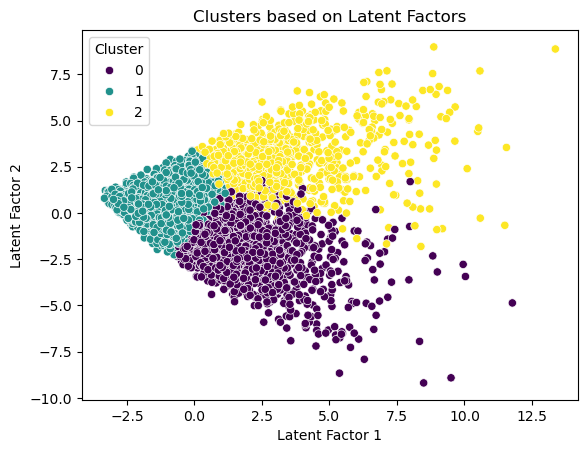

In [13]:
# apply clustring on latent factor
from sklearn.cluster import KMeans

# Use K-Means clustering on the latent factors
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(pca_result_reduced)

# Visualize the clusters
sns.scatterplot(x=data['Latent Factor 1'], y=data['Latent Factor 2'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters based on Latent Factors')
plt.show()

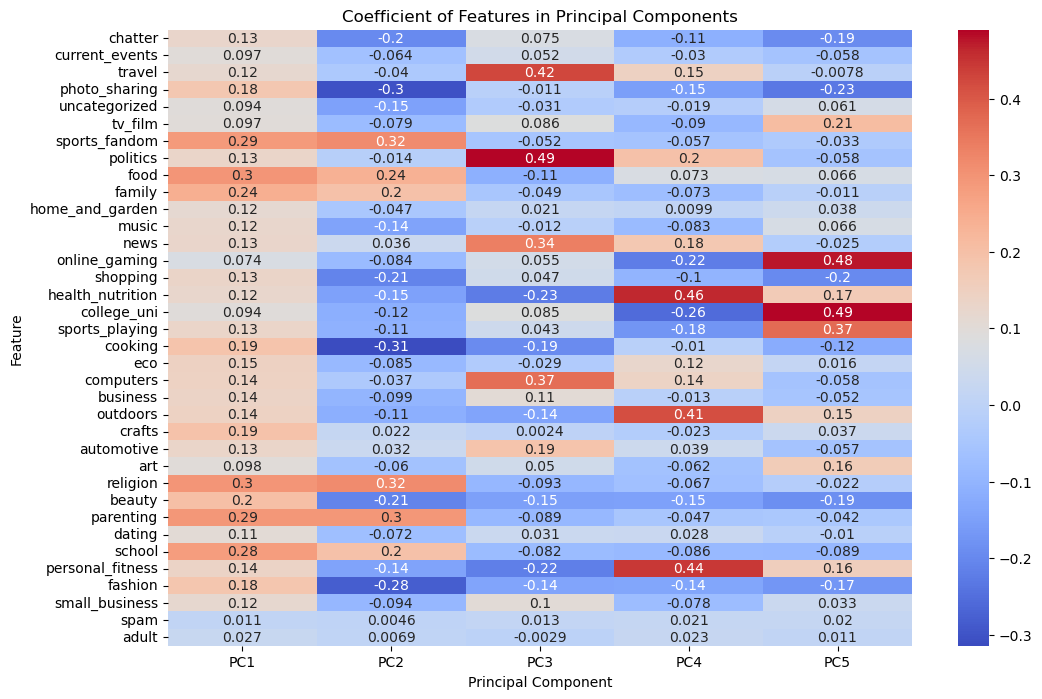

In [14]:
# Get the component loadings (coefficients)
loadings = pca.components_
# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components)], index=normalized_data.columns)
# Plot the coefficients for each feature in each principal component
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Coefficient of Features in Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Feature')
plt.show()

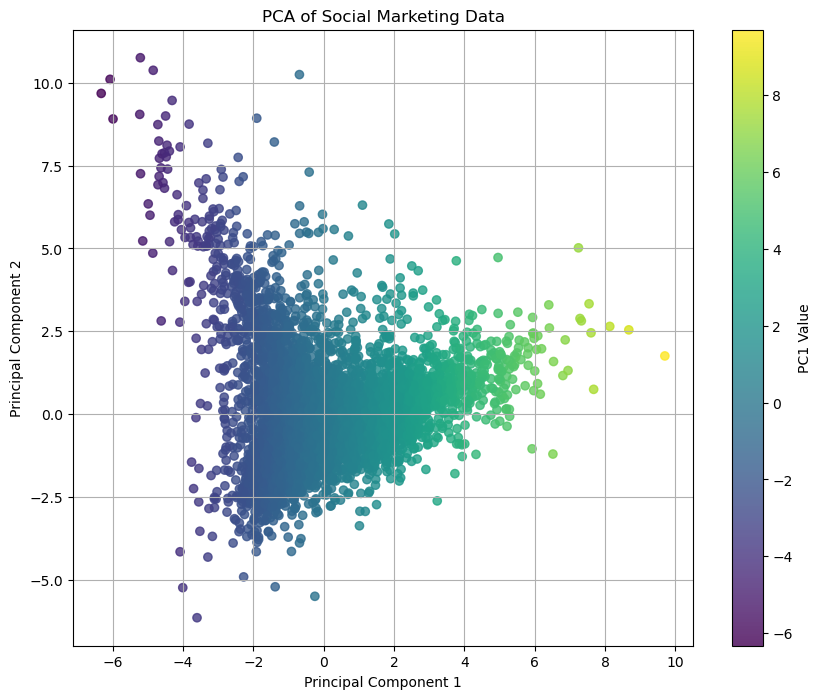

In [15]:
# Assuming pca_df is your DataFrame with PCA results
plt.figure(figsize=(10, 8))

# Color coding based on 'PC1' values using a colormap
plt.scatter(pca_df['PC4'], pca_df['PC5'], c=pca_df['PC4'], cmap='viridis', alpha=0.8)

plt.title('PCA of Social Marketing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='PC1 Value')  # Adding a colorbar to show the scale
plt.grid(True)
plt.show()

# tSNE for dimn reduction as well


In [16]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)  # data_scaled is the standardized data

# Convert the result into a DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE 1', 't-SNE 2'])

/opt/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


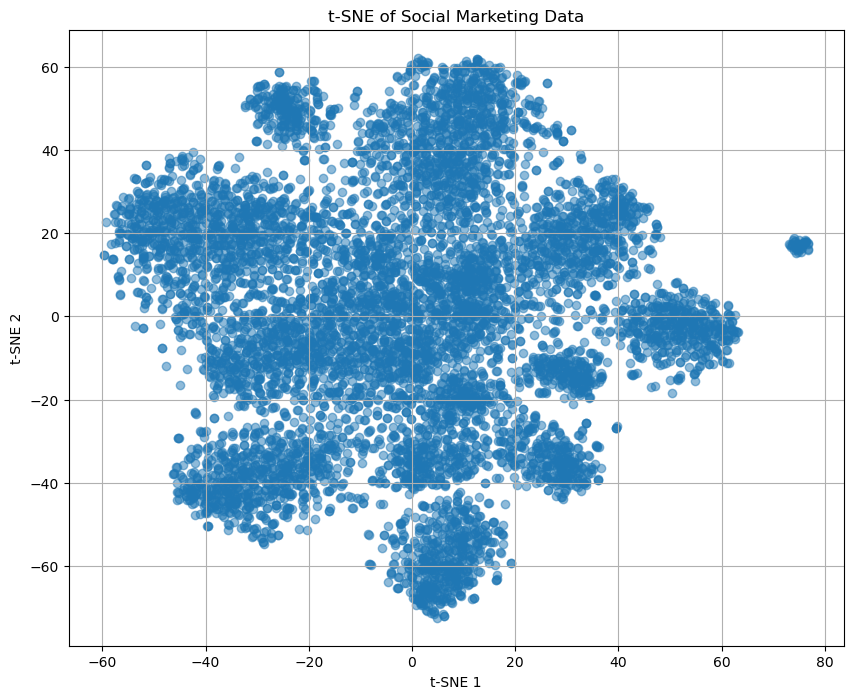

In [17]:
# Plot the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], alpha=0.5)
plt.title('t-SNE of Social Marketing Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()

# using KMeans - PCA and tSNE

In [18]:
# Use the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)


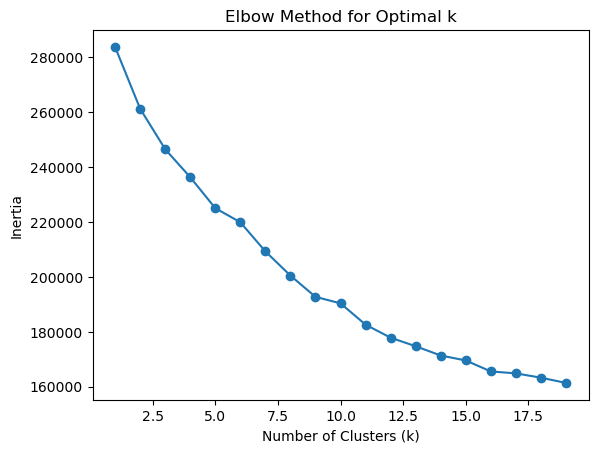

In [19]:
# Plot the Elbow method graph
plt.plot(range(1, 20), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

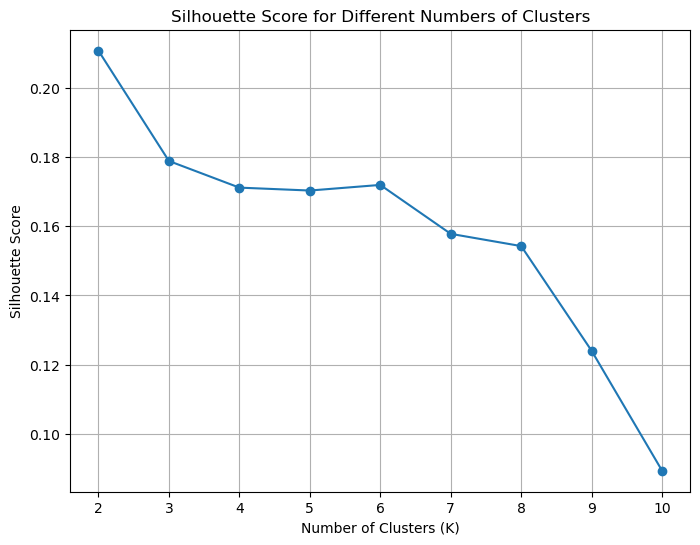

In [20]:
from sklearn.metrics import silhouette_score

# Define the range of clusters to try
range_n_clusters = range(2, 11)
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# lets say K = 3


### using k Means with tsne

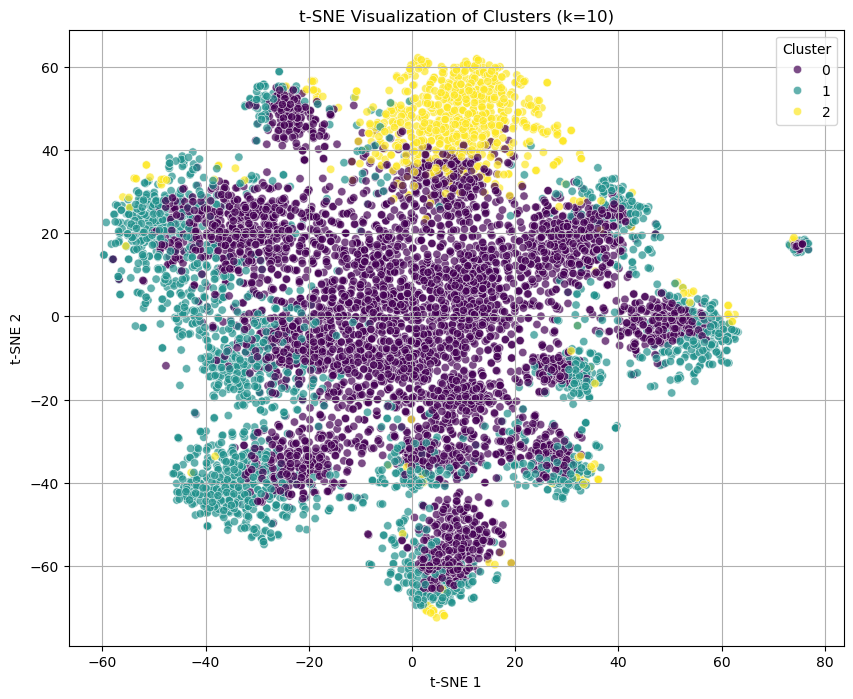

In [21]:
import matplotlib.pyplot as plt
# Apply K-means with k=10
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Add the cluster labels to the t-SNE DataFrame for visualization
tsne_df['Cluster'] = labels

# Plot the t-SNE results with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=tsne_df, palette='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Clusters (k=10)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


### using KMeans with PCA

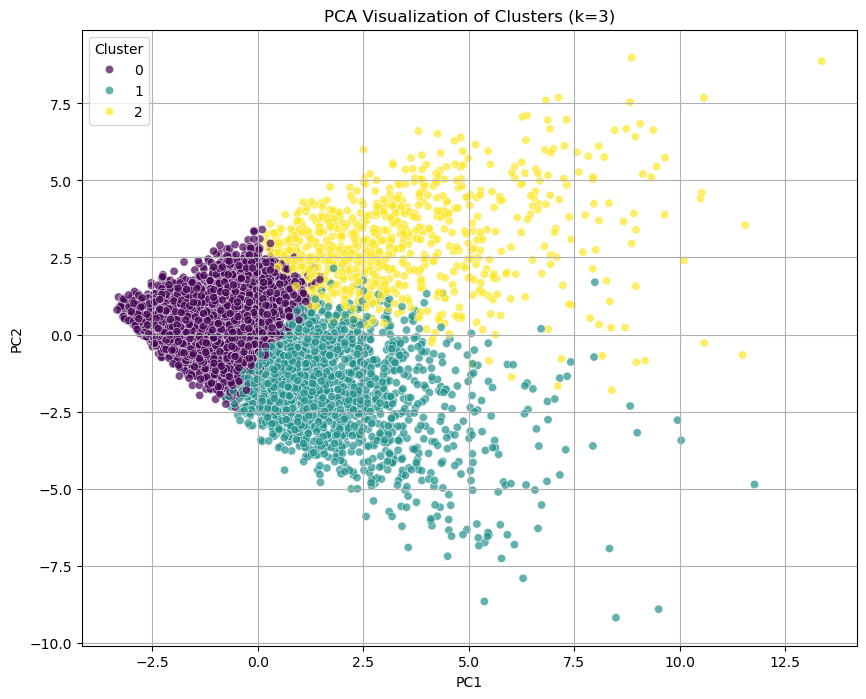

In [22]:
import matplotlib.pyplot as plt
# Apply K-means with k=10
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Add the cluster labels to the t-SNE DataFrame for visualization
pca_df['Cluster'] = labels

# Plot the t-SNE results with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA Visualization of Clusters (k=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## using other plots for KMeans

In [23]:
optimal_k = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_data)

# Step 4: Analyzing the clusters
# Calculate the mean values for each cluster to understand the characteristics of each group
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_analysis = data[numeric_columns].groupby('Cluster').mean()

                Cluster 0  Cluster 1  Cluster 2  Cluster 3
chatter          2.881276   9.151084   4.007569   4.014060
current_events   1.386124   1.853870   1.539262   1.715290
travel           1.500754   1.858824   1.496689   1.659051
photo_sharing    1.494075   5.219814   2.423841   5.852373
uncategorized    0.696402   0.920743   0.955535   1.193322


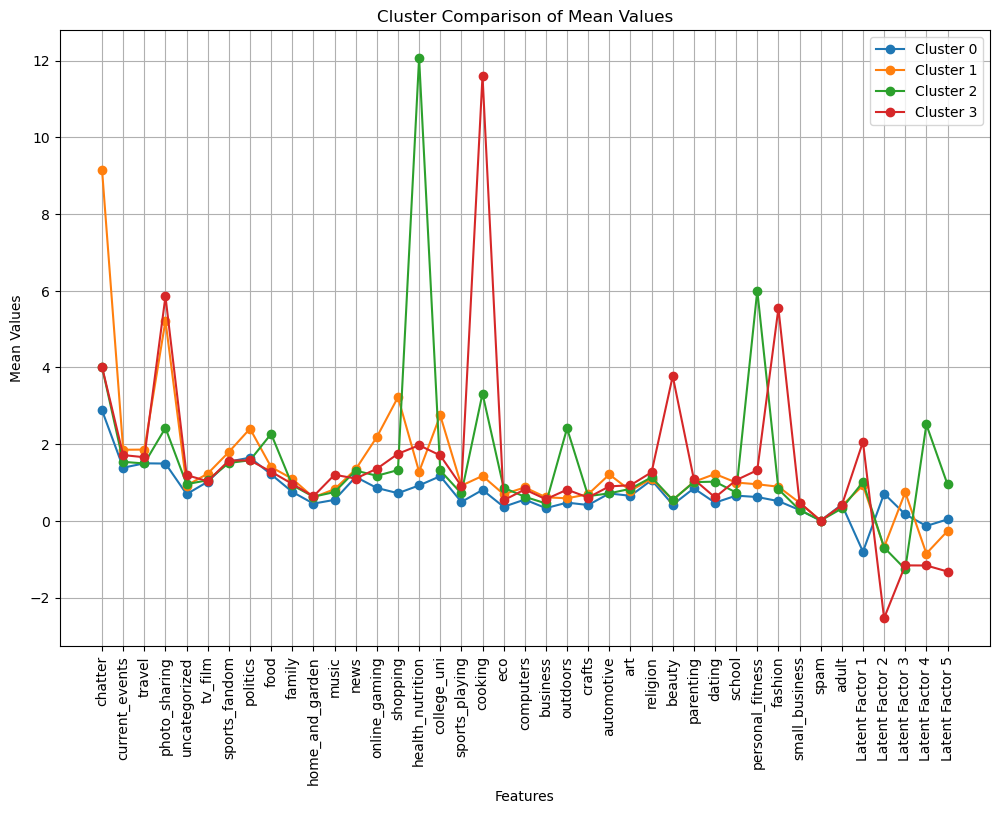

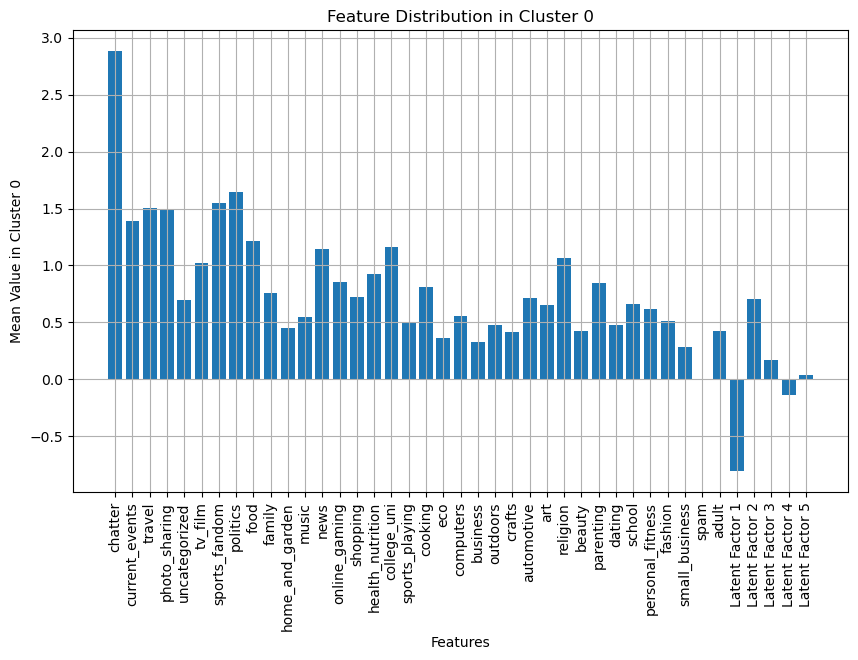

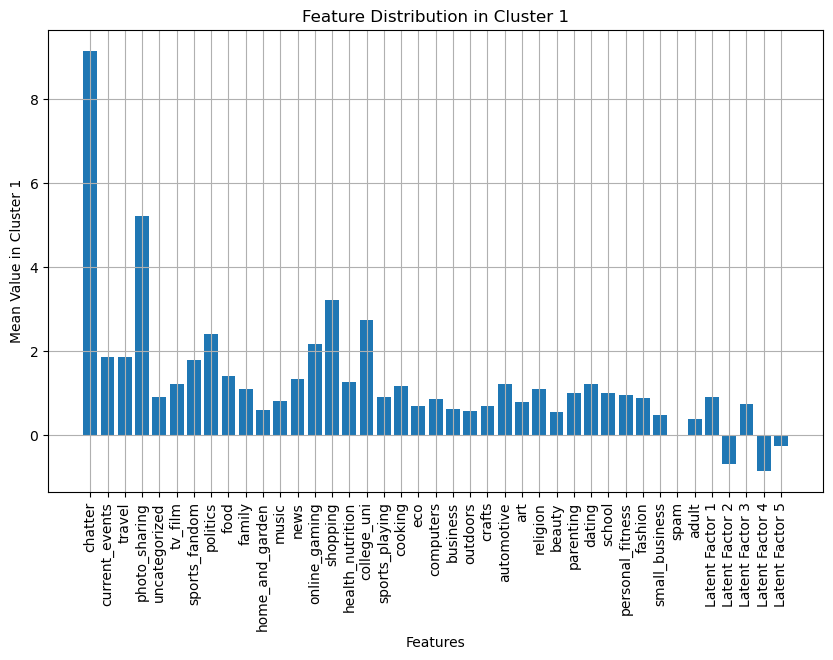

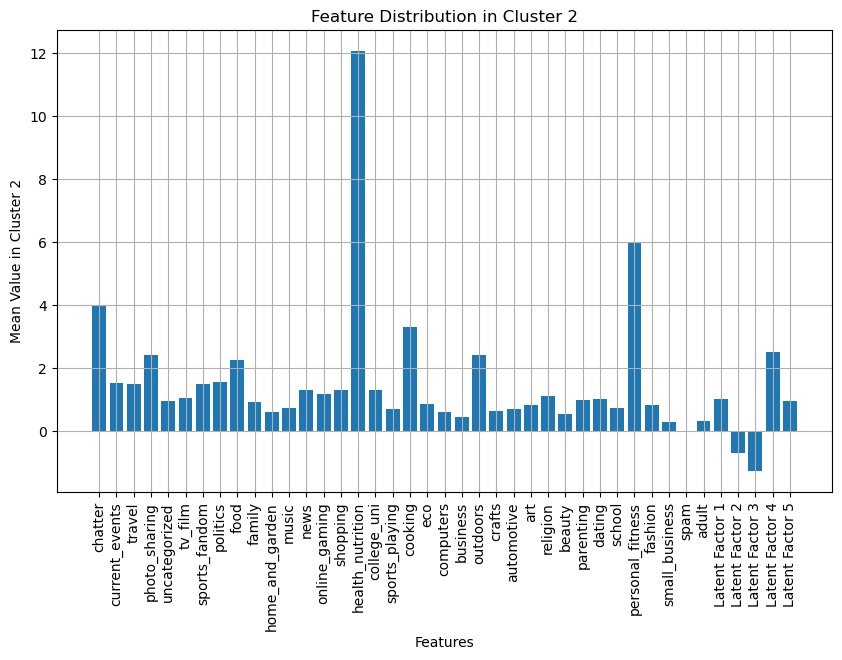

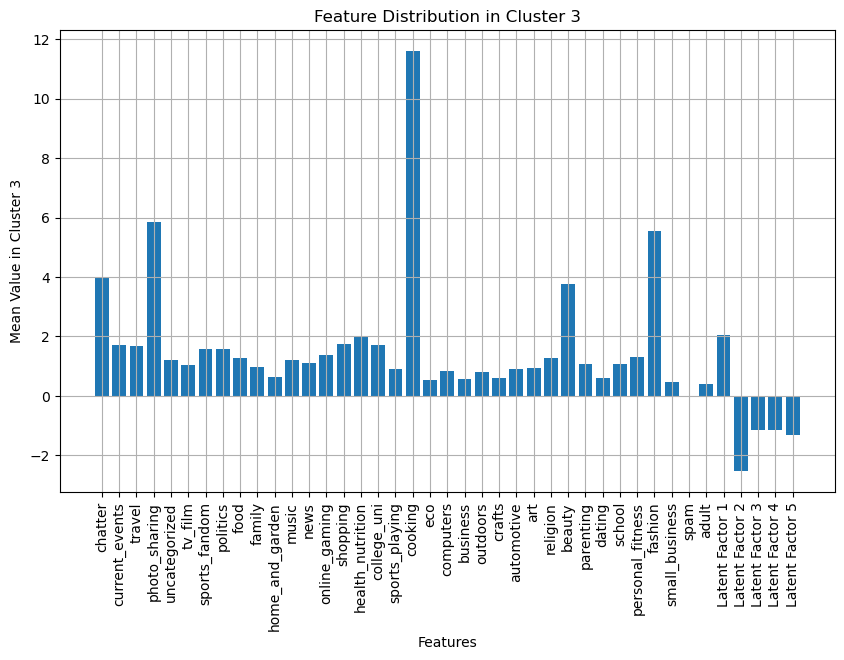

In [24]:
cluster_analysis_t = cluster_analysis.T
cluster_analysis_t.columns = [f'Cluster {i}' for i in range(len(cluster_analysis_t.columns))]
print(cluster_analysis_t.head())

# Step 3: Compare Clusters
# Plotting the mean values for each feature across clusters
plt.figure(figsize=(12, 8))
for col in cluster_analysis_t.columns:
    plt.plot(cluster_analysis_t.index, cluster_analysis_t[col], marker='o', label=col)

plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.title('Cluster Comparison of Mean Values')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Check for Overlap
# You can visually inspect the plot to see if the clusters have similar or distinct characteristics

# Additional Analysis: Visualizing individual clusters
# If needed, you can also create bar charts for individual clusters

for i, col in enumerate(cluster_analysis_t.columns):
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_analysis_t.index, cluster_analysis_t[col])
    plt.xlabel('Features')
    plt.ylabel(f'Mean Value in {col}')
    plt.title(f'Feature Distribution in {col}')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

### Cluster 0 (Blue Line):
- **Chatter**: This cluster has lower values for "chatter" compared to others.
- **Health and Nutrition**: Slightly lower engagement in "health_nutrition" compared to other clusters.
- **Latent Factors**: The latent factors seem relatively balanced with no extreme deviations, suggesting that this cluster is somewhat neutral or balanced across most features without specific dominance.

### Cluster 1 (Orange Line):
- **Current Events and Travel**: Higher engagement in "current_events" and "travel" compared to other clusters.
- **Latent Factors**: This cluster seems to have higher values in some latent factors, particularly PC1 and PC4. This might indicate that users in this cluster are interested in specific topics captured by these latent factors, which might be related to travel, current events, or other broader categories.

### Cluster 2 (Green Line):
- **Health and Nutrition**: This cluster shows a significant spike in "health_nutrition," suggesting that users in this cluster are particularly focused on health-related topics.
- **Personal Fitness**: Higher engagement in "personal_fitness" compared to other clusters.
- **Latent Factors**: There's also a noticeable peak in Latent Factor 2, indicating that this cluster might be strongly influenced by whatever feature or combination of features PC2 represents.

### Cluster 3 (Red Line):
- **Online Shopping and Fashion**: Extremely high values in "online_shopping" and "fashion," indicating that this cluster is heavily focused on these activities.
- **Personal Fitness**: Similar to Cluster 2, there is also high engagement in "personal_fitness."
- **Latent Factors**: Latent Factor 1 and Latent Factor 3 are particularly high, suggesting that these users are highly influenced by the underlying components represented by these factors, likely related to consumer behavior, fashion, and shopping.

### General Insights:
- **Cluster 0**: Could represent a more balanced group with general interests across various categories.
- **Cluster 1**: Might consist of users who are very interested in travel and current events, with a focus on activities captured by the specific latent factors.
- **Cluster 2**: Primarily focused on health, nutrition, and fitness, making it a valuable target for health-related products and services.
- **Cluster 3**: Likely represents a group of users who are highly engaged in shopping, fashion, and possibly consumer-driven activities.

### Actionable Recommendations:
- For **Cluster 0**, a generalized marketing approach might be effective, as their interests are spread across various topics.
- **Cluster 1** could be targeted with content related to travel, current events, and potentially broader lifestyle topics.
- **Cluster 2** should be a key focus for health companies, as they show strong interest in health, nutrition, and fitness.
- **Cluster 3** can be targeted with marketing focused on fashion, online shopping, and consumer products.

These interpretations can guide how a health company or any other organization might focus its efforts based on the interests and characteristics of each user cluster.